In [1]:
import numpy as np 
import pandas as pd 
    
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


<h3><center>VERİ SETİ</center></h3>

Veri setine kaggle.com üzerinde <a href = "https://www.kaggle.com/datasets/kukuroo3/used-car-price-dataset-competition-format" >Bu link üzerinden</a> ulaşabilirsiniz.

<p>Veri setimiz araç bilgilerini tutan ve hangi özellikteki araçların hangi fiyata satıldığını bize söyleyen bir 
veri kümesidir
    <h5>Amacımız</h5>
    Hangi özelliklerin fiyat üzerinde etkili olduğunu, markaların mil ve yakıt masrafı üzerindeki etkisi gibi sorular ile öncelikle bir analiz yapmak daha sonra da verdiğimiz araç özelliklerine göre bize bir tahmini satış fiyatı veren modeli eğitmektir.
</p>

Veri setimiz, ilişkisel 4 farklı tablodan oluşuyor. Biz bu tabloları birleştirdikten sonra tek bir veriseti oluşturacağız ve işlemlerimizi onun üzerinde yapacağız.


<h3><center>Veri Setindeki Sütunlar</center></h3>
<ul>
<li>carID - Uniq değer olan bir sütun, analizlerde kullanmayacağız bu yüzden silinebilir.</li>
<li>brand - araba marka bilgisini tutan sütun</li>
<li>model - araba model bilgisini tutan sütun</li>
<li>year - araba modelinin hangi yıla ait olduğunu tutan sütun</li>
<li>transmission - araba vites bilgisini tutan sütun, kategoriktir. manuel, automatic- semi automatic</li>
<li>mileage	 - aracın aldığı mil</li>
<li>fuelType - yakıt tipi. kategoriktir. diesel, petrol, other ve electric olarak 4'e ayrılır.</li>
<li>tax - Aracın vergi bilgisini tutan sütun.</li>
<li>mpg - Aracın mil başına yaktığı yakıt miktarı, galon olarak.</li>
<li>engineSize - motorun hacim bilgisi.</li>
<li>price - aracın satın alınma fiyatı.</li>
    </ul>

<h4>Veri Setinin Birleştirilmesi ve Hazırlanması</h4>

carID üzerinden veri setinin birleştirilme işlemi ve null değer ve tiplerin kontrolü.

In [2]:
X_train = pd.read_csv('Datasets//X_train.csv', sep = ',')
X_test = pd.read_csv('Datasets//X_test.csv', sep = ',')
y_train = pd.read_csv('Datasets//y_train.csv', sep = ',')
y_test= pd.read_csv('Datasets//y_test.csv', sep = ',')

In [6]:
X_train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [7]:
X_test.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0


In [8]:
y_train.head()

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990


In [10]:
y_test.head()

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000


In [3]:
train_full = X_train.merge(y_train , on = 'carID')
test_full = X_test.merge(y_test, on = 'carID')
full_data = pd.concat([train_full, test_full])
full_data.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990


In [4]:
full_data.isnull().any()
#null değerimiz yok.

carID           False
brand           False
model           False
year            False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
price           False
dtype: bool

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7632 entries, 0 to 2671
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         7632 non-null   int64  
 1   brand         7632 non-null   object 
 2   model         7632 non-null   object 
 3   year          7632 non-null   int64  
 4   transmission  7632 non-null   object 
 5   mileage       7632 non-null   int64  
 6   fuelType      7632 non-null   object 
 7   tax           7632 non-null   float64
 8   mpg           7632 non-null   float64
 9   engineSize    7632 non-null   float64
 10  price         7632 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 715.5+ KB


In [6]:
#Sütun tiplerini değiştiriyoruz.
full_data = full_data.astype({"brand":'category', "model":'category',"transmission":'category',"fuelType":'category'})
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7632 entries, 0 to 2671
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   carID         7632 non-null   int64   
 1   brand         7632 non-null   category
 2   model         7632 non-null   category
 3   year          7632 non-null   int64   
 4   transmission  7632 non-null   category
 5   mileage       7632 non-null   int64   
 6   fuelType      7632 non-null   category
 7   tax           7632 non-null   float64 
 8   mpg           7632 non-null   float64 
 9   engineSize    7632 non-null   float64 
 10  price         7632 non-null   int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 510.3 KB


<h3><center>Veri Seti Üzerinde Analiz</center></h3>

Text(0.5, 1.0, 'Markaların dağılımı')

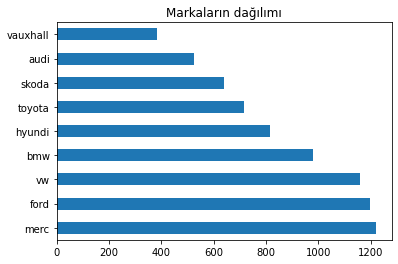

In [7]:
full_data["brand"].value_counts().plot.barh().set_title("Markaların dağılımı")


<AxesSubplot:xlabel='year', ylabel='count'>

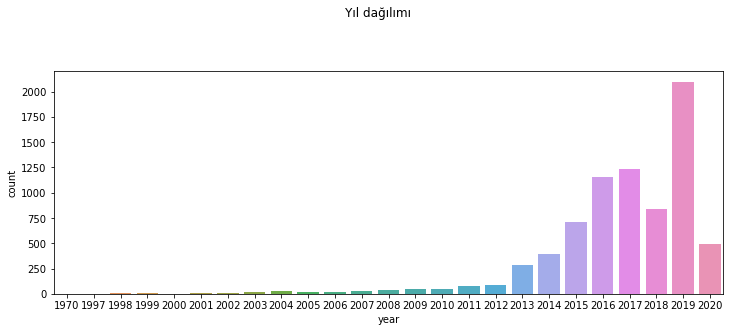

In [8]:
figure1=plt.figure(1,figsize=(12,9))
figure1.suptitle("Yıl dağılımı")
plt.subplot(211)
sns.countplot(full_data["year"],x="Year")

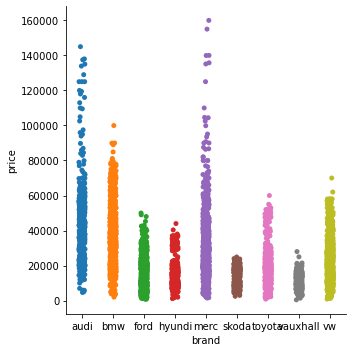

In [9]:
df = full_data
sns.catplot(x = "brand", y = "price", data = df);

En pahalı araçların audi ve mercedes olduğunu görüyoruz. 
Bunun yanında skoda ve auxhall marka araçların ucuz olduklarını görüyoruz.

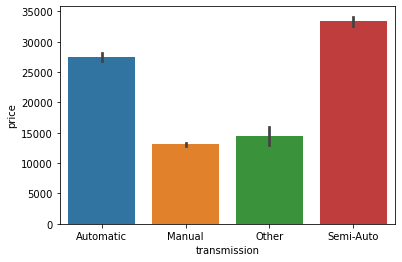

In [10]:
sns.barplot(x = "transmission", y = df.price, data= df);

Other kategorisi dışında standart sapmalar küçük. Bunun için aşağıdakiler rahatlıkla söylenebilir:

Yarı otomatik araçların diğerlerinden daha pahalı ve manuel araçların ise diğerlerine göre daha ucuz.



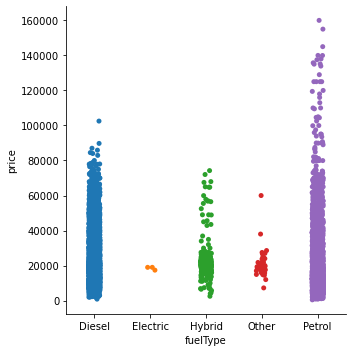

In [11]:
sns.catplot(x = "fuelType", y = "price", data = df);

Bu tabloda en dikkat çeken elektrikli araçarın sayısı. Veri setimizde çok fazla elektrikli araç bulunmuyor.
Bu 3 kayıt üzerinden bir şey söyleyecek olursak elektrikli araçların diğerlerine nazaran daha ucuz olduğu söylenebilir.

Veri setimizde ağırlıklı olarak disel ve petrol kullanan araçlar olduğunu görüyoruz bunun yanında petrollü araçların daha pahalı olduğunu söyleyebiliriz.

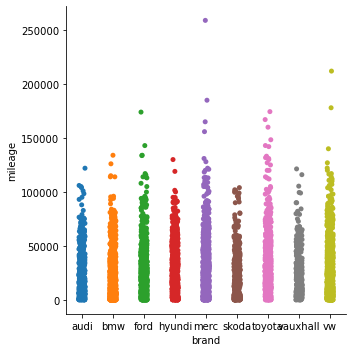

In [12]:
sns.catplot(x = "brand", y = "mileage", data = df);

Araç markası alınan kilometre üzerinde çok fazla etkili değil.

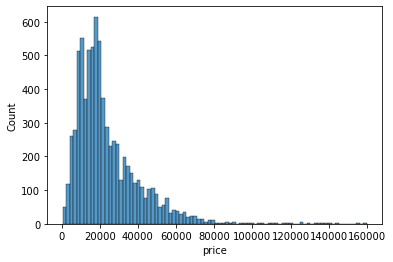

In [13]:
sns.histplot(df.price);

Veri setimizde lüks(pahalı) araç sayısı azınlıkta.

<AxesSubplot:xlabel='brand,fuelType'>

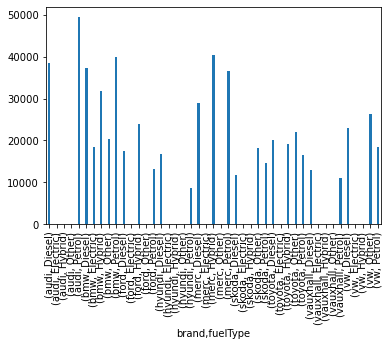

In [14]:
df.groupby(["brand","fuelType"])["price"].mean().plot.bar(stacked=True, width=0.3)

Elektrikli araçlar bmw markasına ait. BMW dışında elektrikli araç yok.

<AxesSubplot:xlabel='brand,transmission'>

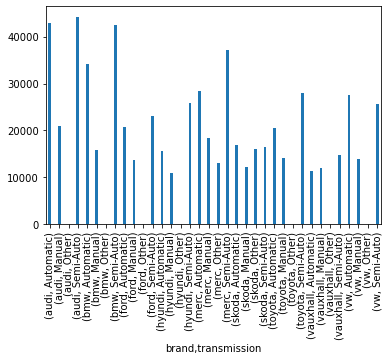

In [15]:
df.groupby(["brand","transmission"])["price"].mean().plot.bar(stacked=True, width=0.3)

Other kategorisine ait araçlar sadece merc markasında bulunuyor. 
Diğer vites türleri tüm markalarda bulunuyor

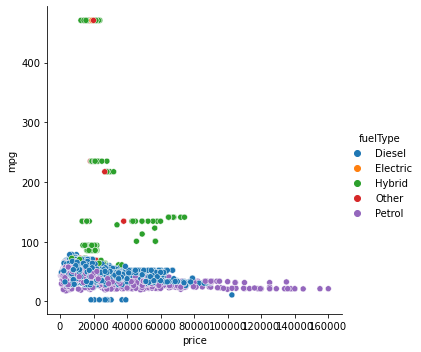

In [16]:
sns.relplot(data=df, x="price", y="mpg", hue="fuelType",kind="scatter")


Hibrit ve elektrikli araçlar galon başına petrol ve Diesel araçlara göre daha fazla mil
sağladığını net bir şekilde görebiliriz. 

Bunun yanında hibrit ve elektrikli araçlar daha ucuz.

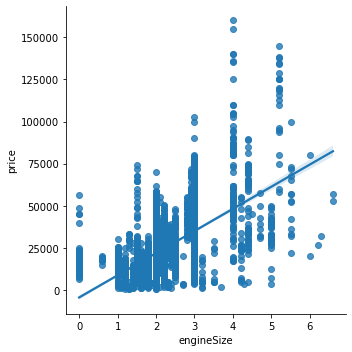

In [17]:
sns.lmplot(y = "price", x = "engineSize", data = df);

Görünüşe göre gerçekten daha küçük boyutlu motorlar, ağır motorlardan nispeten daha ortalamaya sahip ve daha az maliyetli. Daha ağır motor, daha fazla fiyat

<AxesSubplot:>

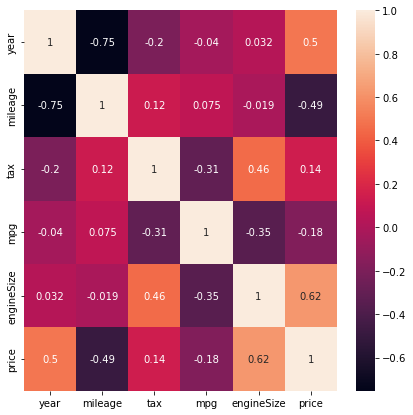

In [18]:
figheat=plt.figure(4,figsize=(7,7))
sns.heatmap(df.iloc[:,1:].corr(),annot=True)

Isı haritasına baktığımızda 
    Yıl arttıkça:
        Fiyat artıyor.
        Motor hacminde küçük de olsa doğrusal bir artış var. 
        Alınan mil düşüyor.
        Yeni araçların vergisinin daha düşük olabileceği de söylenebilir.

    Mil arttıkça:
        Fiyat ve yıl düşüyor.
        Küçük de olsa motor hacmi düşüyor, küçük motorlar daha fazla yol alıyor gibi gözüküyor ama çok küçük bir rakam, göz ardı edilebilir.
        
        Vergiyi arttıran özellikler:
            Motor hacmi başta olmak üzere fiyat ve mil vergiyi yükseltiyor.
        Vergiyi düşüren özellikler:
            Yıl arttıkça vergi düşüyor. Yeni arabalar daha az vergi ödüyor.
            Mil başına yakılan yakıt miktarı azaldıkça ödenilen vergi de azalıyor.
            
       
       Mil başına yakılan yakıt miktarı arttıkça fiyat, motor hacmi ve vergi düşüyor.
       Motor hacmi arttıkça yakılan yakıt azalıyor. Motor hacmi arttıkça fiyat da oldukça artıyor.
            
       Fiyatı vergi ve yıl da arttıran özellikler arasında. Son model araçlar daha pahalı.
        
        

<h3><center>Modelin Oluşturulması</center></h3>

In [20]:
df.isna().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [21]:
## girdi olarak herhangi bir sayısal sütunun 0 olup olmadığını kontrol etme
l=[]
for col in df.columns:
    if df[col].dtype != 'O':
             l.append(col)
    pass

for col in l:
    if df[df[col]==0].value_counts().sum()>=1:
        print(f'{col} : yes')

tax : yes
engineSize : yes


In [22]:
## test verilerinde
for col in l:
    if X_test[X_test[col]==0].value_counts().sum()>=1:
        print(f'{col} : yes')

tax : yes
engineSize : yes


Hem tax ve engineSize sıfır olamaz bu yüzden bu kayıtlarda eksik değerler var.

In [23]:
for col in l:
    if X_test[X_test[col]==0].value_counts().sum()>=1:
        print(f'{col} : yes')

tax : yes
engineSize : yes


In [24]:
df['tax'].replace(0,df['tax'].median(),inplace=True)
df['engineSize'].replace(0,df['engineSize'].median(),inplace=True)

In [25]:
df['tax'].replace(0,df['tax'].median(),inplace=True)
df['engineSize'].replace(0,df['engineSize'].median(),inplace=True)

veri kümemizde boş değer yok

In [26]:
df.groupby('brand').apply(lambda x: x['model'].value_counts().index[0])

brand
audi                  A8
bmw                   X4
ford         Grand C-MAX
hyundi          Santa Fe
merc           CLS Class
skoda              Scala
toyota             Prius
vauxhall      Combo Life
vw                Arteon
dtype: object

In [27]:
# Çarpık verileri Normal dağılıma dönüştürme
df.skew()

carID        -0.010130
year         -2.221587
mileage       1.767751
tax           1.938680
mpg           9.608992
engineSize    1.243563
dtype: float64

In [28]:
#Carid uniq değer model'de işimize yaramayacak, siliyoruz.
df.drop(labels=['carID','model'],axis=1,inplace=True)
X_test.drop(labels=['carID','model'],axis=1,inplace=True)

In [29]:
df.head()

,brand,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,hyundi,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,vauxhall,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,audi,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,vw,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,skoda,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [30]:
^#Kategorik değişkenleri sayısal değişkenlere çevirme.
df=pd.get_dummies(data=df,columns=['brand','transmission','fuelType'],drop_first=True)
X_test=pd.get_dummies(data=X_test,columns=['brand','transmission','fuelType'],drop_first=True)

In [31]:
df.head()

,year,mileage,tax,mpg,engineSize,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2019,4223,145.0,39.8,2.2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,2015,47870,125.0,60.1,2.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,2019,5151,145.0,29.1,2.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2016,20423,30.0,57.6,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2020,3569,145.0,47.1,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [32]:
X_test.head()

,year,mileage,tax,mpg,engineSize,brand_bmw,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12046,150.0,37.2,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2017,37683,260.0,36.2,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2019,10000,145.0,34.0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2019,3257,145.0,49.6,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,2015,20982,325.0,29.4,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
clf=RandomForestRegressor()
clf.fit(df,y_train['price'])
y_pred_rfc=clf.predict(X_test)

In [ ]:
clf=AdaBoostRegressor()
clf.fit(df,y_train['price'])
y_pred_ada=clf.predict(X_test)

In [ ]:
clf=LinearRegression()
clf.fit(df,y_train['price'])
y_pred_lr=clf.predict(X_test)

In [ ]:
clf=XGBRegressor()
clf.fit(df,y_train['price'])
y_pred_xgb=clf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
## Linear Regression

print(mean_squared_error(y_test['price'],y_pred_lr))
print(r2_score(y_test['price'],y_pred_lr))

In [ ]:
## Random Forest 

print(mean_squared_error(y_test['price'],y_pred_rfc))
print(r2_score(y_test['price'],y_pred_rfc))

In [ ]:
## Ada Boost
print(mean_squared_error(y_test['price'],y_pred_ada))
print(r2_score(y_test['price'],y_pred_ada))